In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment class

In [87]:
class Experiment():
  def __init__(self,flags,mcts_configs,stats_keys,scores,progress,game_stats,player_stats,avg_score,avg_progress
               ,avg_time,errors,game_stats_full=None,player_stats_full=None):
    self.name = flags["agent"]+" vs "+flags["agents"]
    self.flags = flags
    self.mcts_configs = mcts_configs
    self.scores = scores
    self.progress = progress
    self.stats_keys = stats_keys
    self.game_stats = game_stats #lsit
    self.game_stats_full = game_stats_full
    self.player_stats = player_stats
    self.player_stats_full = player_stats_full
    self.avg_score = avg_score
    self.avg_time = avg_time
    self.errors = errors
    self.game_df = self.convert_to_df(game_stats)
    self.player_dfs = []
    for i in range(len(self.player_stats)):
      player_df = self.convert_to_df(player_stats[i])
      player_df["information_perc"] = player_df["information"]/(player_df["moves"].replace(0,1))
      player_df["discard_perc"] = player_df["discard"]/(player_df["moves"].replace(0,1))
      player_df["play_perc"] = player_df["play"]/(player_df["moves"].replace(0,1))
      self.player_dfs.append(player_df)
    
      
  def convert_to_df(self, stat_list):
    stat_df = pd.DataFrame({stat_string:[s[self.stat_index(stat_string)] for s in stat_list] for stat_string in self.stats_keys})
    return stat_df

  def stat(self,stat_string):
    return self.game_df[stat_string]
  
  def player_stat(self,stat_string,player=0):
    return self.player_dfs[player][stat_string]
  
  def nonzero(self,stat_string):
    return (self.game_df[stat_string] != 0).sum() / len(self.game_df)
  
  def avg(self,stat_string):
    return sum(self.game_df[stat_string])/len(self.game_df)
  
  def player_avg(self,stat_string, player=0):
    return sum(self.player_dfs[player][stat_string])/len(self.player_dfs[player])
  
  def player_perc_nonzero(self,stat_string,player=0):
    return (self.player_dfs[player][stat_string] != 0).sum() / len(self.player_dfs[player])
  
  def compute_avg_stat_raw(self,stat_string):
    total_score = sum([game[self.stat_index(stat)] for game in self.game_stats])
    return total_score/len(self.game_stats)
  
  def stat_index(self,stat_string):
    return self.stats_keys.index(stat_string)

  def __str__(self):
    return str(self.flags)

  def __repr__(self):
    return str(self.flags)

Define notebook functions

In [135]:
def explain_experiment(exp):
    print(exp.name)
    print(exp)
    print(f"Available stats: {exp.stats_keys}")
    print(f"Scores: {exp.scores}")
    print(f"Progress: {exp.progress}")
    print(f"Printed average game score {exp.avg_score}")
    print(f"Computed average game score {exp.avg('score')}")
    print(f"Computed average game progress {exp.avg('progress')}")
    print(f"Computed average game regret {exp.avg('regret')}")

def plot_hist(series,xlabel="x",ylabel="y",title="",xlim=None,ylim=None,bins=None):
  fig, ax = plt.subplots()
  if bins is None:
    bins = np.arange(0, series.max() + 1.5) - 0.5
  ax.hist(series,bins)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  if xlim:
    ax.set_xlim(xlim)
  if ylim:
    ax.set_ylim(ylim)
  
  plt.show()
  
def row_experiment(exp,player=0):
  """Squish experiment into one row"""
  exp_dict = {}
  exp_dict["name"] = exp.name
  exp_dict["avg_score"] = exp.avg("score")
  exp_dict["avg_progress"] = exp.avg("progress")
  exp_dict["avg_regret"] = exp.avg("regret")
  exp_dict["regret"] = exp.player_avg("regret",player), 
  exp_dict["regret_nonzero"] = exp.player_perc_nonzero("regret",player)
  exp_dict["regret_discard"] = exp.player_avg("regret_discard_critical",player)
  exp_dict["regret_discard_perc"]= exp.player_perc_nonzero("regret_discard_critical",player)
  exp_dict["regret_play"] = exp.player_avg("regret_play_fail",player)
  exp_dict["regret_play_perc"]= exp.player_perc_nonzero("regret_play_fail",player)
  exp_dict["regret_endgame"] = exp.player_avg("regret_play_fail_endgame",player)
  exp_dict["regret_endgame_perc"]= exp.player_perc_nonzero("regret_play_fail_endgame",player)
  exp_dict["info"] = exp.player_avg("information",player)
  exp_dict["info_perc"] = exp.player_avg("information_perc",player)
  exp_dict["discard"] = exp.player_avg("discard",player) 
  exp_dict["discard_perc"]=   exp.player_avg("discard_perc",player)
  exp_dict["play"] = exp.player_avg("play",player)
  exp_dict["play_perc"] = exp.player_avg("play_perc",player)
  exp_df = pd.DataFrame(exp_dict)
  return exp_df
  

Read in data`

In [103]:
file_path = "vrun_rulebased_2/"
file_names = {"vrun_rulebased3p":"vrun_rulebased3p.sh.o"}
file_names = {k:file_path+v for k,v in file_names.items()}
master_experiments = {}
experiments = None
for k,v in file_names.items():
  experiments = None
  exec(open(v).read()) # Defines a list of experiments_store (eg. 2p - 5p)
  assert experiments is not None
  master_experiments[k] = experiments

experiment_list = master_experiments["vrun_rulebased3p"]
experiment_dict = {exp.name:exp for exp in experiment_list}

for exp in experiment_list:
  explain_experiment(exp)

MuteAgent vs MuteAgent
{'players': 3, 'num_episodes': 250, 'agent': 'MuteAgent', 'agents': 'MuteAgent', 'mcts_types': '000', 'agent_classes': ['MuteAgent', 'MuteAgent', 'MuteAgent']}
Available stats: ['score', 'progress', 'moves', 'regret', 'regret_discard_critical', 'regret_play_fail', 'regret_play_fail_critical', 'regret_play_fail_endgame', 'discard', 'discard_critical', 'discard_useful', 'discard_safe', 'play', 'play_success', 'play_fail', 'play_fail_critical', 'play_fail_endgame', 'information', 'information_color', 'information_rank', 'elapsed_time']
Scores: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Analyse data

In [105]:
experiment_dict

{'MuteAgent vs MuteAgent': {'players': 3, 'num_episodes': 250, 'agent': 'MuteAgent', 'agents': 'MuteAgent', 'mcts_types': '000', 'agent_classes': ['MuteAgent', 'MuteAgent', 'MuteAgent']},
 'LegalRandomAgent vs LegalRandomAgent': {'players': 3, 'num_episodes': 250, 'agent': 'LegalRandomAgent', 'agents': 'LegalRandomAgent', 'mcts_types': '555', 'agent_classes': ['LegalRandomAgent', 'LegalRandomAgent', 'LegalRandomAgent']},
 'FlawedAgent vs FlawedAgent': {'players': 3, 'num_episodes': 250, 'agent': 'FlawedAgent', 'agents': 'FlawedAgent', 'mcts_types': '555', 'agent_classes': ['FlawedAgent', 'FlawedAgent', 'FlawedAgent']},
 'InnerAgent vs InnerAgent': {'players': 3, 'num_episodes': 250, 'agent': 'InnerAgent', 'agents': 'InnerAgent', 'mcts_types': '555', 'agent_classes': ['InnerAgent', 'InnerAgent', 'InnerAgent']},
 'OuterAgent vs OuterAgent': {'players': 3, 'num_episodes': 250, 'agent': 'OuterAgent', 'agents': 'OuterAgent', 'mcts_types': '555', 'agent_classes': ['OuterAgent', 'OuterAgent',

In [115]:
pd.concat([row_experiment(exp,0) for k,exp in experiment_dict.items()])

,name,avg_score,avg_progress,avg_regret,regret,regret_nonzero,regret_discard,regret_discard_perc,regret_play,regret_play_perc,regret_endgame,regret_endgame_perc,info,info_perc,discard,discard_perc,play,play_perc
0,MuteAgent vs MuteAgent,0.000,1.260,25.000,8.136,0.432,0.000,0.000,8.136,0.432,7.976,0.324,0.000,0.000000,0.000,0.000000,1.440,1.000000
0,LegalRandomAgent vs LegalRandomAgent,0.000,1.364,25.000,8.796,0.532,0.272,0.180,8.524,0.428,8.372,0.352,3.208,0.543625,1.220,0.183657,1.412,0.272718
0,FlawedAgent vs FlawedAgent,0.000,1.464,25.000,9.148,0.464,0.000,0.000,9.148,0.464,9.008,0.368,0.188,0.053181,0.000,0.000000,1.524,0.946819
0,InnerAgent vs InnerAgent,10.676,10.676,10.020,3.208,0.864,3.208,0.864,0.000,0.000,0.000,0.000,11.156,0.478813,8.508,0.365137,3.616,0.156050
0,OuterAgent vs OuterAgent,15.348,15.348,6.236,2.040,0.800,2.040,0.800,0.000,0.000,0.000,0.000,9.840,0.447143,7.172,0.325699,4.992,0.227158
0,IGGIAgent vs IGGIAgent,15.896,15.896,6.360,2.092,0.800,2.092,0.800,0.000,0.000,0.000,0.000,9.548,0.438874,6.744,0.309854,5.464,0.251272
0,PiersAgent vs PiersAgent,16.928,16.928,5.768,1.840,0.784,1.700,0.772,0.140,0.076,0.000,0.000,8.816,0.416568,6.160,0.290706,6.192,0.292726
0,VanDenBerghAgent vs VanDenBerghAgent,17.124,17.124,3.952,1.188,0.568,1.104,0.532,0.084,0.060,0.000,0.000,8.696,0.414143,6.036,0.287475,6.248,0.298381


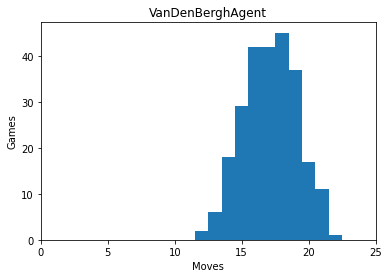

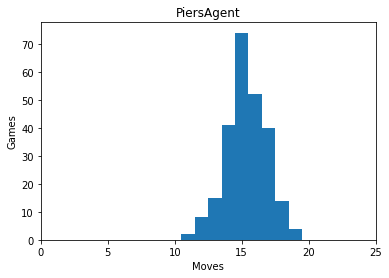

In [138]:
for k,v in experiment_dict



plot_hist(experiment_dict["VanDenBerghAgent vs VanDenBerghAgent"].game_df["score"],xlabel="Moves",ylabel="Games", title="VanDenBerghAgent", xlim=(0,25))
plot_hist(experiment_dict["OuterAgent vs OuterAgent"].game_df["score"],xlabel="Moves",ylabel="Games", title="PiersAgent", xlim=(0,25))

In [131]:
sum(experiment_dict["OuterAgent vs OuterAgent"].game_df["score"] == 13)

15